In [1]:
# standard ds imports
import numpy as np
import pandas as pd

# for wrangling and exploration
import wrangle
import explore
import model

# for statistical testing
import scipy.stats as stats

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

# filter out noise
import warnings
warnings.filterwarnings('ignore')

# align markdown tables to the left

In [2]:
%%html
<style>
table {float:left}
</style>

# MYERS BRIGGS TWITTER ASSESSMENT

This project is designed to analyze the relationship between the 16 Myers Briggs personality types and twitter behavior. The results.....

----

## Executive Summary:

Goals:
- analyze relationships between tweets and the myers briggs 16 personalities
- build a classification model to predict a personality type based on a user's tweets

Key Findings:
- stuff
- things

Takeaways:
- Our best model, a multinomial Naive Bayes using TF-IDF, performed at 17.5% accuracy on the test dataset. This barely outperforms the baseline at 17.2%.
- things

Recommendations:
- Due to the low accuracy, it is not recommended to use this for individual predictions.
- However, looking at how types and domains interact can provide business insights for targeted marketing and training for known personality types

----
## 1. Planning
 - Create deliverables:
     - README
     - final_report.ipynb
     - working_report.ipynb
     - canva presentation
 - Bring over functional wrangle.py, explore.py, and model.py files
 - Acquire the data from the Kaggle and Twitter via acquire.py's web scraping. Save the data locally.
 - Prepare and split the data via the prepare.py functions
 - Explore the data and define hypothesis. Run the appropriate statistical tests in order to accept or reject each null hypothesis. Document findings and takeaways.
 - Model a baseline in predicting personality type and document the accuracy.
 - Fit and train classification models to predict personality type or domain on the train dataset.
 - Evaluate the models by comparing the train and validation data.
 - Select the best model and evaluate it on the train data.
 - Develop and document all findings, takeaways, recommendations and next steps.

----
## 2. Data Wrangling
This step calls the wrangle function from the wrangle.py. This function:
- reads the fivezerominpull.plk file saved locally

#### Data Dictionary

| Target | Type | Description |
| ---- | ---- | ---- |
| type | str | the 16 myers briggs personality types |

| Feature Name | Type | Description |
| ---- | ---- | ---- |
| name | str | the owner of the twitter account scraped |
| lemmatized | str | the lemmatized version of past 100 tweets scraped by user |
| personality_domain | str | which of the 4 domains the personality type is in |
| sentiment | float | the compound sentiment score |
| message_length | int | the count of characters in the combined 100 tweets after lemmatization |
| word_count | int | the count of words in the combined 100 tweets after lemmatization |
| i_e | int | i for introvert, e for extrovert |
| s_n | int | s for sensing, n for intuitive |
| f_t | int | f for feeling, t for thinking |
| p_j | int | p for perceiving, j for judging |

In [3]:
# call the wrangle function from wrangle.py
df = wrangle.wrangle()

In [4]:
# split
train, val, test = wrangle.split_data(df)

In [5]:
# verify the split
train.shape, val.shape, test.shape

((359, 11), (120, 11), (120, 11))

### Wrangling Takeaways
- stuff
- things

----
## 2. Data Exploration

What does the data look like? (Percent population -> flow chart with ratios)

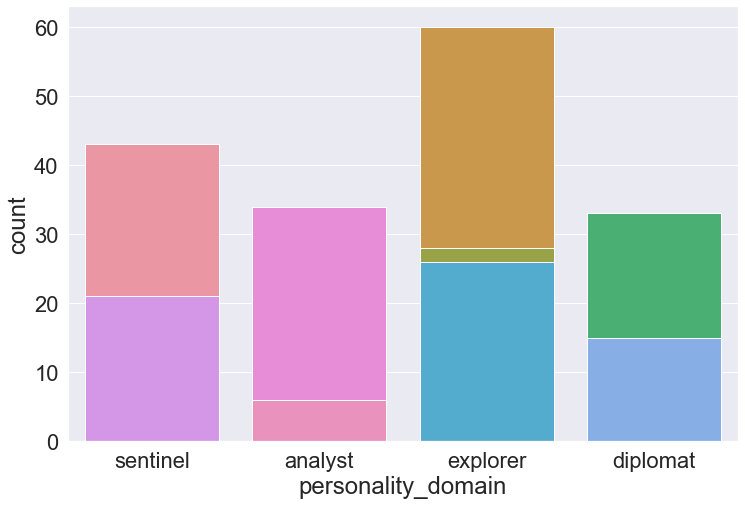

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(data=train, x='personality_domain', hue='type', dodge=False)
plt.legend().set_visible(False)
plt.show()

### Question 1: What scale of groupings shows a significant relationship in sentiment? Pairs, types, or domains?

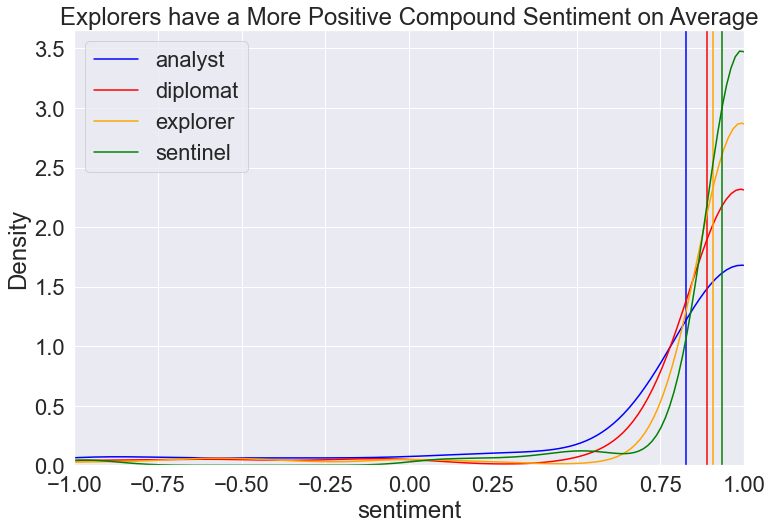

In [7]:
explore.q1_vis(train)

#### Hypothesis 1:

    Ho -> The mean sentiment for explorers is less than or equal to the mean sentiment for analysts
    Ha -> The mean sentiment for explorers is greater than the mean sentiment for analysts
    T-Test, Two-Sample, One-Tailed

In [8]:
explore.q1_stats(train)


        Fail to Reject the Null Hypothesis.
        Findings suggest there is less than or equal mean sentiment between analysts and explorers.
        


### Question 1 Takeaways
- stuff
- things

---
### Question 2a: What words are seen across all personality types?

In [9]:
explore.q2a_vis(train)

placeholder


#### Hypothesis 2:

    Ho ->
    Ha ->
    T-Test, One-Sample, Two-Tailed

In [10]:
explore.q2a_stats(train)

placeholder


### Question 2b: What words are unique to introvert or extrovert?

In [11]:
explore.q2b_vis(train)

placeholder


In [12]:
explore.q2b_stats(train)

placeholder


### Question 2 Takeaways
- stuff
- things

---
### Question 3: Is there a relationship between word count and personality type?

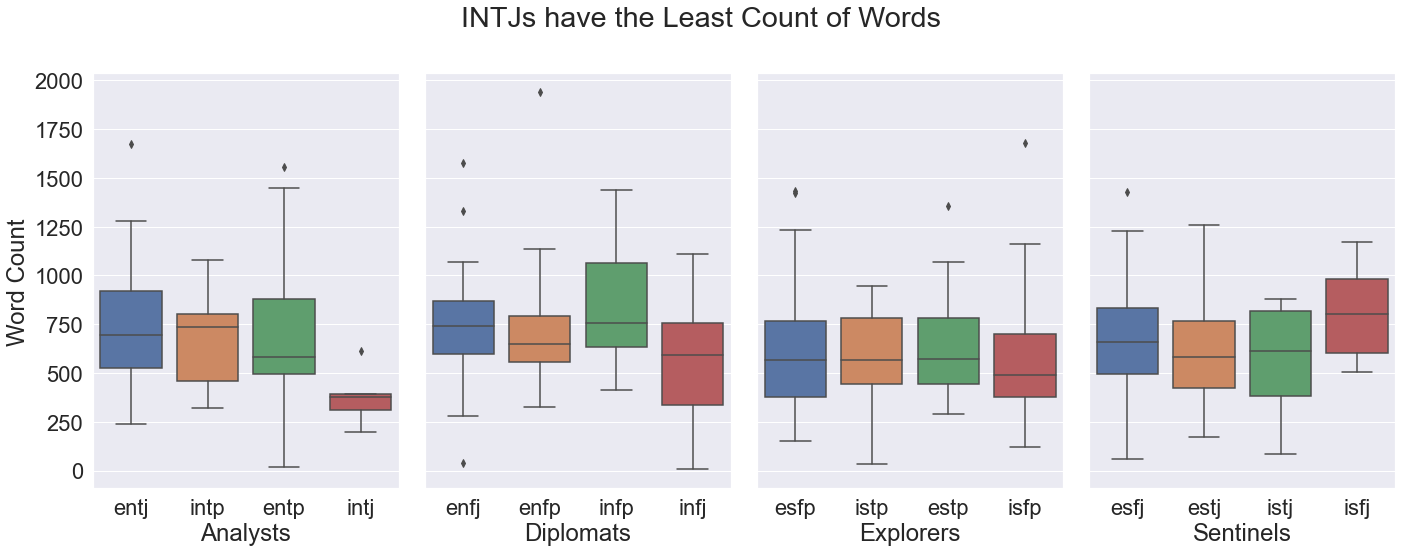

In [13]:
explore.q3_vis(train)

#### Hypothesis 3:

    Ho ->
    Ha ->
    T-Test, One-Sample, Two-Tailed

In [14]:
explore.q3_stats(train)

placeholder


### Question 3 Takeaways
- stuff
- things

### Exploration Takeaways
- stuff
- things
- more stuff

---
## Data Modeling
The goal is to maximize accuracy.

| Features Dropped | Features Kept |
| ---- | ---- |
| pairs | lemmatized |
| domain | bow |
| sentiment | TF-IDF |
| message_length |  |
| word_count |  |
|  |  |

In [15]:
# get the baseline accuracy
model.get_baseline(df)

'Baseline Accuracy: 17.2'

In [16]:
# get the model results on train and validate
model.top_3_16_personalities(df)

Top Model per Feature
-------------
Bag of Words MultinomialNB Train Accuracy: 84.96%
-------------
Bag of Words MultinomialNB Validate Accuracy: 17.50%
-------------
TF-IDF MultinomialNB Train Accuracy: 25.63%
-------------
TF-IDF MultinomialNB Validate Accuracy: 17.50%
-------------


Top Clustering Model
-------------
Cluster MultinomialNB Train Accuracy: 19.50%
-------------
Cluster MultinomialNB Validate Accuracy: 15.00%
-------------


In [17]:
# get the best model's results on test
model.test_16_personalities(df)

-------------
TF-IDF MultinomialNB Test Accuracy: 17.50%
-------------


### Modeling Takeaways:
- The best model was the TF-IDF Multinomial Naive Bayes model at % accuracy on test.
- The other models showed strong signs of overfitting the data on train, but were producing similar results on validate.

---
## Conclusion
Main conclusion note here

### Recommendations
- stuff
- things

### Next Steps:
- stuff
- things
---